In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# reading the dataset

lccs = pd.read_csv('loan.csv')
lccs.head()

C:\Users\ricky\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
lccs.shape

(39717, 111)

In [4]:
lccs.isna().mean()*100

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.098195
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

In [5]:
##Identify columns with all NA values >= 60%
loan_df = pd.read_csv('loan.csv')
df_cols = pd.DataFrame(loan_df.isna().mean()*100)

df_cols_with_na = df_cols[df_cols[0] >= 60]
df_cols_with_na.index.name = 'col_name'
df_cols_with_na.reset_index(inplace=True)
na_list = df_cols_with_na['col_name'].tolist()

## dropping those columns with 60% missing data
loan_df.drop(na_list, axis =1, inplace = True)
loan_df.columns

## writing the file to excel to analyse
#loan_df.to_excel('loan_df.xlsx', index = None)

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths',
       'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [6]:
loan_df.shape

(39717, 54)

In [7]:
loan_df.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
int_rate                       object
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
url                            object
desc                           object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                     int64
earliest_cr_

In [12]:
# selecting the loans_status other than 'current', as we cannot derive insights from these running loans.
# so considering only 'Charged-off' and 'Fully-paid' loans in the dataset.
loan_df = loan_df[loan_df['loan_status'] != 'Current']
print('Shape of the dataframe with Charged-off and Fully-paid loans: ',loan_df.shape)

Shape of the dataframe with Charged-off and Fully-paid loans:  (38577, 42)


In [8]:
loan_df.nunique()

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
desc                          26527
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths              

In [113]:
#shape before dropping
print('shape of dataframe before dropping : ',loan_df.shape)
# Identifying & dropping the columns containing 0/nan
print('unique values in collections_12_mths_ex_med:', loan_df['collections_12_mths_ex_med'].unique())
print('unique values in acc_now_delinq:', loan_df['acc_now_delinq'].unique())
print('unique values in chargeoff_within_12_mths:', loan_df['chargeoff_within_12_mths'].unique())
print('unique values in delinq_amnt:', loan_df['delinq_amnt'].unique())
print('unique values in pymnt_plan:', loan_df['pymnt_plan'].unique())
print('unique values in tax_liens:', loan_df['tax_liens'].unique())
print('unique values in out_prncp:', loan_df['out_prncp'].unique())
print('unique values in out_prncp_inv:', loan_df['out_prncp_inv'].unique())


loan_df.drop(['collections_12_mths_ex_med','acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','pymnt_plan' , 
              'tax_liens','out_prncp','out_prncp_inv'], axis=1,inplace = True)

print('shape of dataframe post dropping 0/nan valued columns :',loan_df.shape)

shape of dataframe before dropping :  (38577, 44)


KeyError: 'collections_12_mths_ex_med'

In [10]:
# Dropping the columns containing only single value, These are not adding any value to analysis
print('shape of dataframe before dropping single valued columns : ',loan_df.shape)
print('unique values in application_type:', loan_df['application_type'].unique())
print('unique values in policy_code:', loan_df['policy_code'].unique())
print('unique values in initial_list_status:', loan_df['initial_list_status'].unique())

loan_df.drop(['initial_list_status','application_type','policy_code'], axis=1, inplace = True)
print('shape of dataframe post dropping single valued columns :',loan_df.shape)

shape of dataframe before dropping single valued columns :  (39717, 48)
unique values in application_type: ['INDIVIDUAL']
unique values in policy_code: [1]
unique values in initial_list_status: ['f']
shape of dataframe post dropping single valued columns : (39717, 45)


In [11]:
# dropping the columns which cannot be included in analysis, as they have very wide-spread subjective data
print('shape of dataframe before dropping wide spread columns :',loan_df.shape)

loan_df.drop(['url','desc','id'], axis=1, inplace = True)

print('shape of dataframe post dropping wide spread columns :',loan_df.shape)

shape of dataframe before dropping wide spread columns : (39717, 45)
shape of dataframe post dropping wide spread columns : (39717, 42)


In [13]:
# checking the NA values in the subset across columns
loan_df.isna().mean()*100

member_id                  0.000000
loan_amnt                  0.000000
funded_amnt                0.000000
funded_amnt_inv            0.000000
term                       0.000000
int_rate                   0.000000
installment                0.000000
grade                      0.000000
sub_grade                  0.000000
emp_title                  6.185033
emp_length                 2.677761
home_ownership             0.000000
annual_inc                 0.000000
verification_status        0.000000
issue_d                    0.000000
loan_status                0.000000
purpose                    0.000000
title                      0.028514
zip_code                   0.000000
addr_state                 0.000000
dti                        0.000000
delinq_2yrs                0.000000
earliest_cr_line           0.000000
inq_last_6mths             0.000000
open_acc                   0.000000
pub_rec                    0.000000
revol_bal                  0.000000
revol_util                 0

In [14]:
# categorising major columns into categorical, numerical variables and loan attribute columns
cat_cols = ['term','grade','sub_grade','home_ownership','verification_status','loan_status', 'purpose','zip_code',
           'addr_state']

num_cols = ['emp_length','annual_inc','delinq_2yrs','inq_last_6mths','total_rec_prncp','total_rec_int','total_rec_late_fee',
           'recoveries','collection_recovery_fee','earliest_cr_line']

loan_att_cols = ['loan_amnt','funded_amnt','funded_amnt_inv','int_rate','installment','dti','open_acc','pub_rec',
                 'revol_bal','revol_util','total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv',
                 'total_rec_prncp','total_rec_int','total_rec_late_fee','last_pymnt_amnt','pub_rec_bankruptcies']


## Univariate Analysis

In [15]:
# distribution of 'term' of the loan
loan_df.groupby('term').size()/len(loan_df) * 100

term
 36 months    75.42318
 60 months    24.57682
dtype: float64

In [16]:
loan_df['term'].replace(' 36 months', 36, inplace =True)
loan_df['term'].replace(' 60 months', 60, inplace =True)

In [17]:
loan_df.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1296599,5000,5000,4975.0,36,10.65%,162.87,B,B2,NaN,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1314167,2500,2500,2500.0,60,15.27%,59.83,C,C4,Ryder,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1313524,2400,2400,2400.0,36,15.96%,84.33,C,C5,NaN,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1277178,10000,10000,10000.0,36,13.49%,339.31,C,C1,AIR RESOURCES BOARD,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
5,1311441,5000,5000,5000.0,36,7.90%,156.46,A,A4,Veolia Transportaton,...,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0


In [18]:
loan_df['loan_status_flag'] = loan_df['loan_status'].apply(lambda x: 0 if x=='Charged Off' else 1)

1    88.909128
0    11.090872
Name: loan_status_flag, dtype: float64


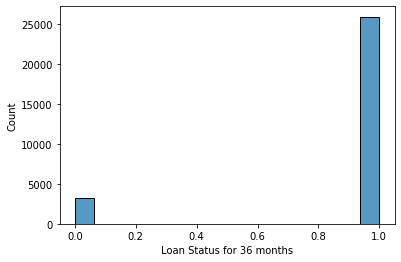

In [19]:
#The loan tenure of charged off vs fully repoaid in 36 months
loan_df_36 = loan_df[loan_df.term == 36]
sns.histplot(loan_df_36.loan_status_flag)
plt.xlabel('Loan Status for 36 months')
print(loan_df_36.loan_status_flag.value_counts(normalize = True)*100)

1    74.686215
0    25.313785
Name: loan_status_flag, dtype: float64


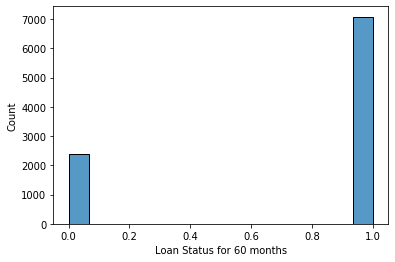

In [20]:
#The loan tenure of charged off vs fully repoaid in 60 months
loan_df_60 = loan_df[loan_df.term == 60]
sns.histplot(loan_df_60.loan_status_flag)
plt.xlabel('Loan Status for 60 months')
print(loan_df_60.loan_status_flag.value_counts(normalize = True)*100)

60 months Term of the loan shows higher Charged off percentage

In [21]:
loan_df.home_ownership.value_counts(normalize = True)*100

RENT        47.904192
MORTGAGE    44.122145
OWN          7.711849
OTHER        0.254037
NONE         0.007777
Name: home_ownership, dtype: float64

In [22]:
# replacing 'NONE' with 'OTHER'
loan_df.home_ownership.replace('NONE','OTHER', inplace =True)
loan_df.home_ownership.value_counts(normalize = True)*100

RENT        47.904192
MORTGAGE    44.122145
OWN          7.711849
OTHER        0.261814
Name: home_ownership, dtype: float64

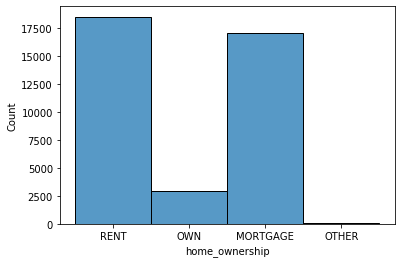

In [23]:
sns.histplot(loan_df.home_ownership)

### Defining a Function for Analyzing the Columns with 'Charged Off', 'Fully Paid' and 'Both Charged Off and 'Fully Paid'

In [24]:
def plot_hist(df_nm,col_nm,status_flag):
    df_nm.sort_values(col_nm, ascending = False, inplace = True)
    if status_flag != 3:
        df_nm = df_nm[df_nm.loan_status_flag == status_flag]
    print(df_nm[col_nm].value_counts())
    print("============================================")
    print(df_nm[col_nm].value_counts(normalize=True)*100)
    
    plt.figure(figsize = (30,5))
    sns.histplot(df_nm[col_nm])
    if(status_flag == 1 ):
        plt.xlabel(col_nm +' fully paid')
    elif (status_flag == 0 ) :
        plt.xlabel(col_nm +' charged off') 
    elif (status_flag == 3):
        plt.xlabel(col_nm)

RENT        15641
MORTGAGE    14694
OWN          2532
OTHER          83
Name: home_ownership, dtype: int64
RENT        47.468892
MORTGAGE    44.594841
OWN          7.684370
OTHER        0.251897
Name: home_ownership, dtype: float64


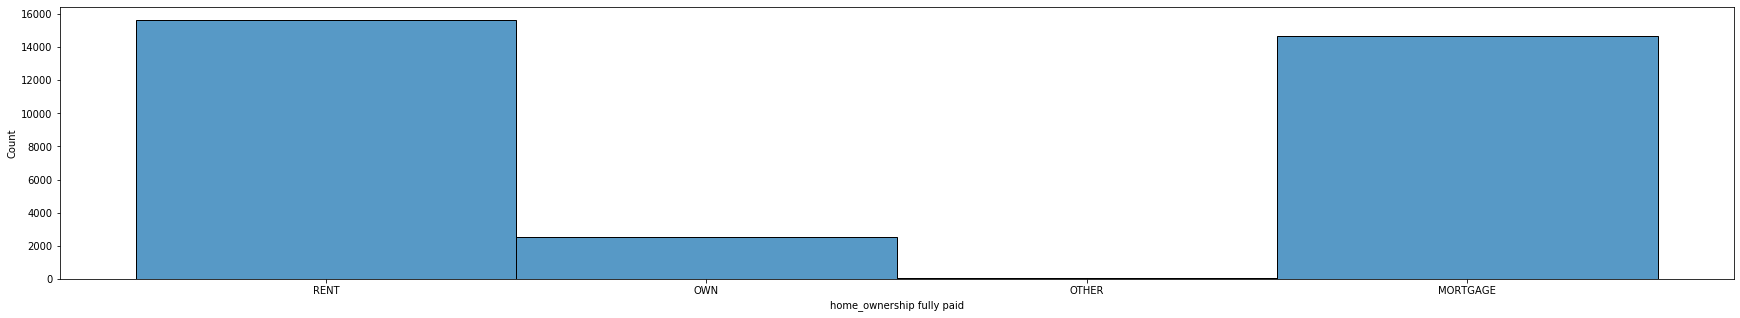

In [25]:
  # fully paid
    plot_hist(loan_df,'home_ownership',1)   

RENT        2839
MORTGAGE    2327
OWN          443
OTHER         18
Name: home_ownership, dtype: int64
RENT        50.453172
MORTGAGE    41.354185
OWN          7.872756
OTHER        0.319886
Name: home_ownership, dtype: float64


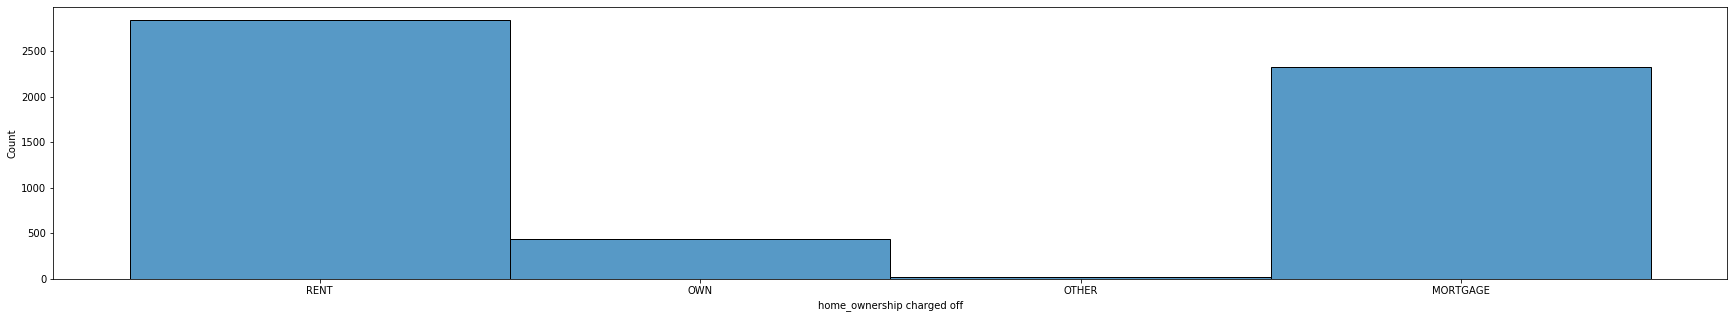

In [26]:
plot_hist(loan_df,'home_ownership',0) 

#Percentage Distribution provided below

Rental & Mortgage have higher probability of charge off than rest categories

debt_consolidation    18055
credit_card            5027
other                  3865
home_improvement       2875
major_purchase         2150
small_business         1754
car                    1499
wedding                 926
medical                 681
moving                  576
vacation                375
house                   367
educational             325
renewable_energy        102
Name: purpose, dtype: int64
debt_consolidation    46.802499
credit_card           13.031081
other                 10.018923
home_improvement       7.452627
major_purchase         5.573269
small_business         4.546751
car                    3.885735
wedding                2.400394
medical                1.765301
moving                 1.493118
vacation               0.972082
house                  0.951344
educational            0.842471
renewable_energy       0.264406
Name: purpose, dtype: float64


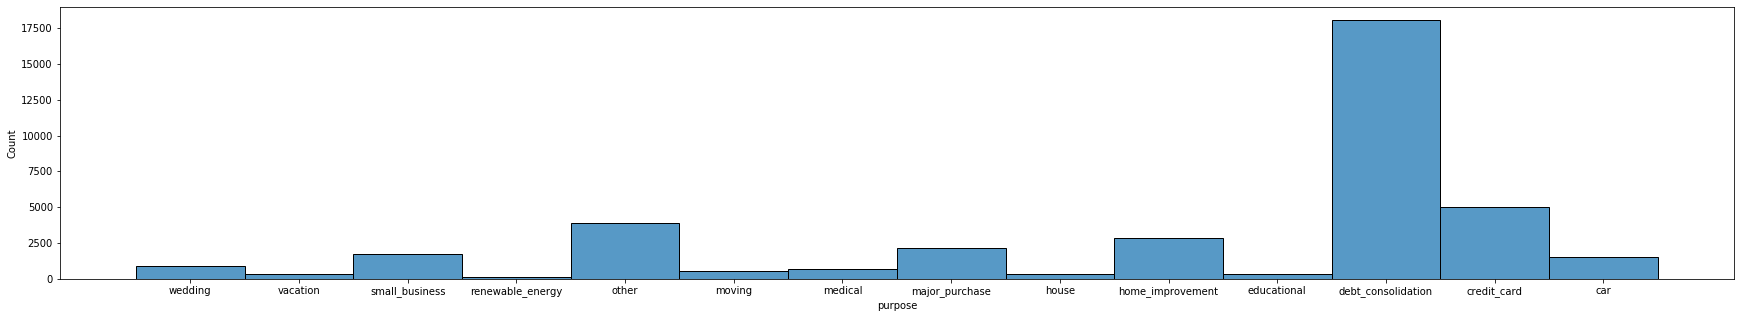

In [27]:
#loan_df.purpose.value_counts(normalize = True)*100
plot_hist(loan_df,'purpose',3)

debt_consolidation    15288
credit_card            4485
other                  3232
home_improvement       2528
major_purchase         1928
car                    1339
small_business         1279
wedding                 830
medical                 575
moving                  484
vacation                322
house                   308
educational             269
renewable_energy         83
Name: purpose, dtype: int64
debt_consolidation    46.397572
credit_card           13.611533
other                  9.808801
home_improvement       7.672231
major_purchase         5.851290
car                    4.063733
small_business         3.881639
wedding                2.518968
medical                1.745068
moving                 1.468892
vacation               0.977238
house                  0.934750
educational            0.816388
renewable_energy       0.251897
Name: purpose, dtype: float64


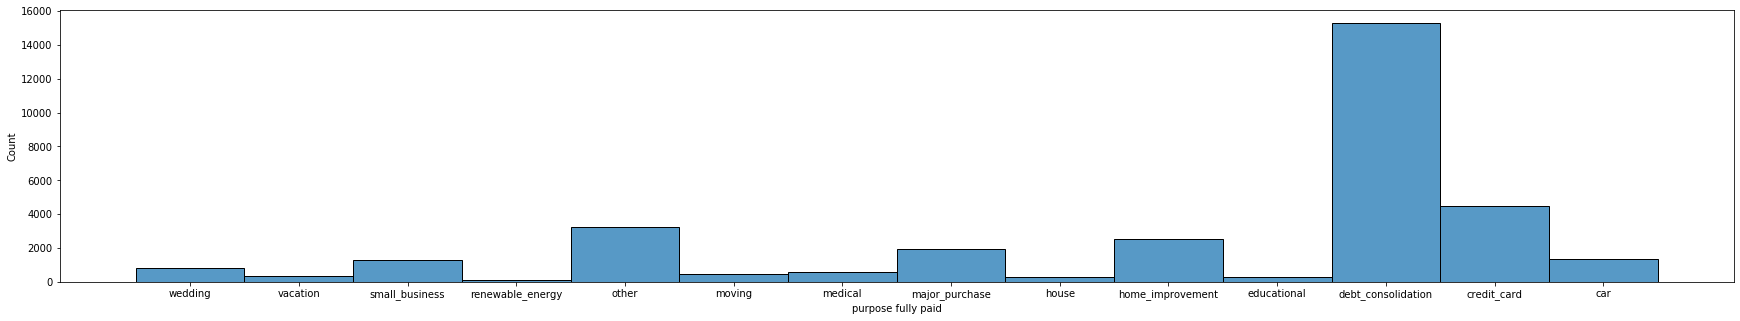

In [28]:
plot_hist(loan_df,'purpose',1) 

debt_consolidation    2767
other                  633
credit_card            542
small_business         475
home_improvement       347
major_purchase         222
car                    160
medical                106
wedding                 96
moving                  92
house                   59
educational             56
vacation                53
renewable_energy        19
Name: purpose, dtype: int64
debt_consolidation    49.173627
other                 11.249334
credit_card            9.632131
small_business         8.441443
home_improvement       6.166696
major_purchase         3.945264
car                    2.843433
medical                1.883775
wedding                1.706060
moving                 1.634974
house                  1.048516
educational            0.995202
vacation               0.941887
renewable_energy       0.337658
Name: purpose, dtype: float64


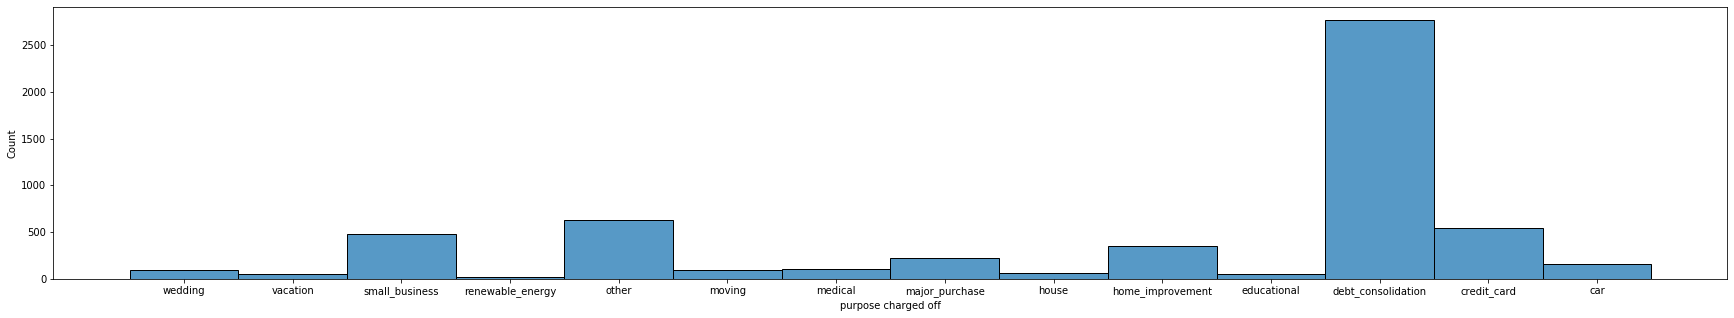

In [29]:
plot_hist(loan_df,'purpose',0) 


It is observed that around 49% of the charge off has happened due to debt_consolidation

Not Verified       16694
Verified           12206
Source Verified     9677
Name: verification_status, dtype: int64
Not Verified       43.274490
Verified           31.640615
Source Verified    25.084895
Name: verification_status, dtype: float64


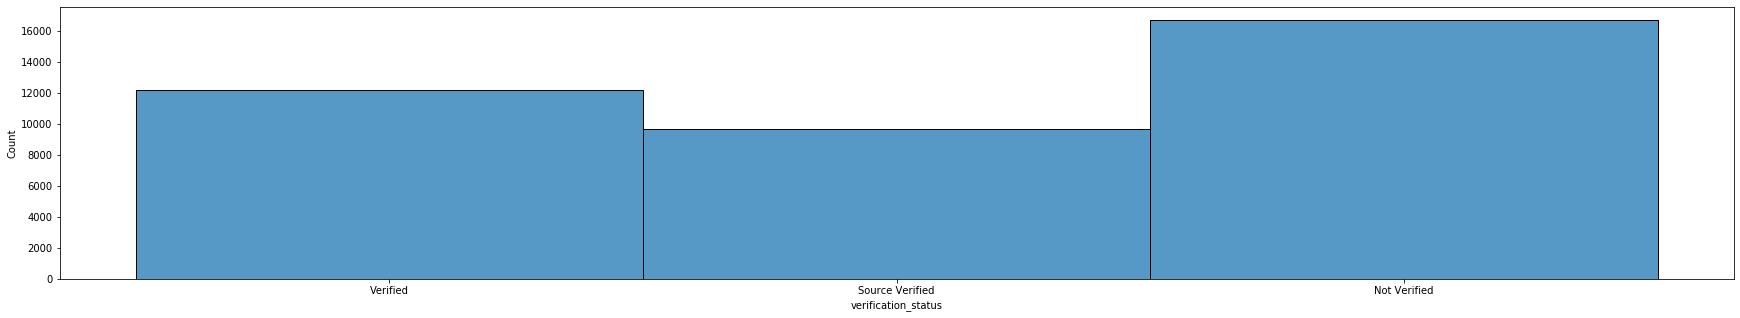

In [30]:
plot_hist(loan_df,'verification_status',3)

Not Verified       14552
Verified           10155
Source Verified     8243
Name: verification_status, dtype: int64
Not Verified       44.163885
Verified           30.819423
Source Verified    25.016692
Name: verification_status, dtype: float64


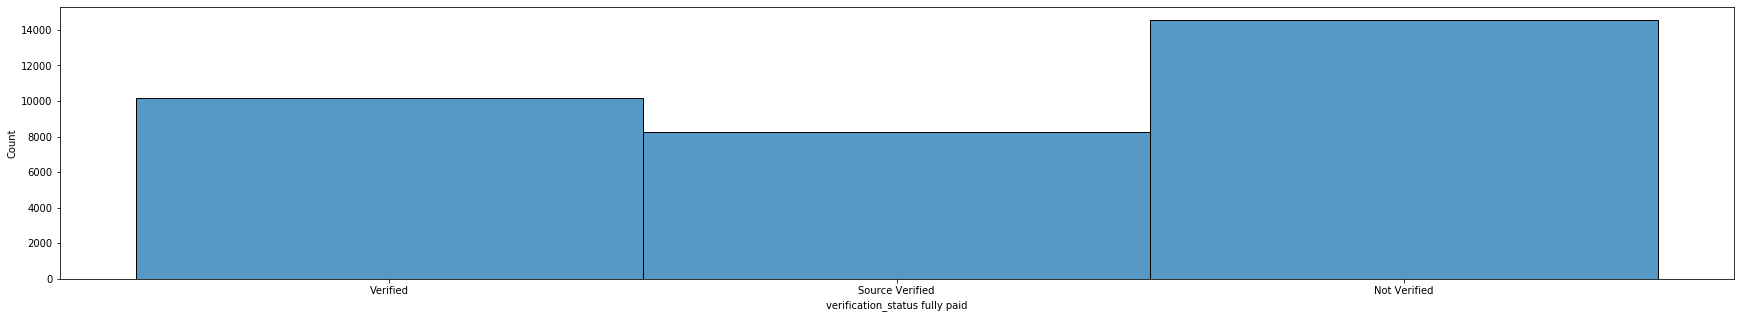

In [31]:
plot_hist(loan_df,'verification_status',1)

Not Verified       2142
Verified           2051
Source Verified    1434
Name: verification_status, dtype: int64
Not Verified       38.066465
Verified           36.449262
Source Verified    25.484272
Name: verification_status, dtype: float64


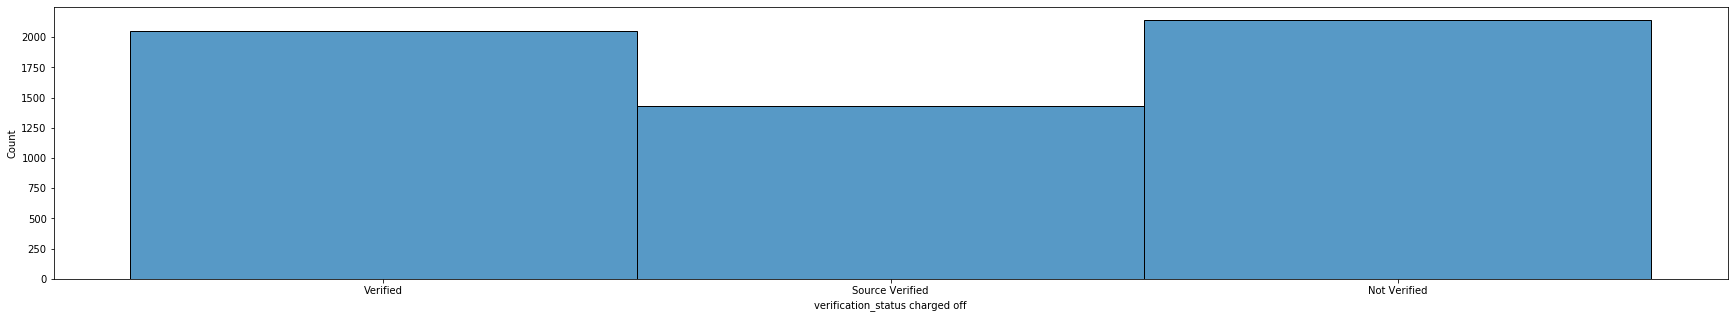

In [32]:
plot_hist(loan_df,'verification_status',0)

No appropriate conclusion

A4    2873
B3    2825
A5    2715
B5    2615
B4    2437
C1    2055
B2    2001
C2    1931
A3    1810
B1    1797
A2    1508
C3    1488
D2    1286
C4    1206
C5    1154
A1    1139
D3    1116
D1     931
D4     918
D5     834
E1     722
E2     614
E3     516
E4     424
E5     387
F1     305
F2     233
F3     174
F4     151
F5     113
G1      94
G2      77
G4      54
G3      45
G5      29
Name: sub_grade, dtype: int64
A4    7.447443
B3    7.323016
A5    7.037872
B5    6.778650
B4    6.317236
C1    5.327008
B2    5.187029
C2    5.005573
A3    4.691915
B1    4.658216
A2    3.909065
C3    3.857221
D2    3.333593
C4    3.126215
C5    2.991420
A1    2.952536
D3    2.892915
D1    2.413355
D4    2.379656
D5    2.161910
E1    1.871582
E2    1.591622
E3    1.337585
E4    1.099101
E5    1.003188
F1    0.790627
F2    0.603987
F3    0.451046
F4    0.391425
F5    0.292921
G1    0.243669
G2    0.199601
G4    0.139980
G3    0.116650
G5    0.075174
Name: sub_grade, dtype: float64


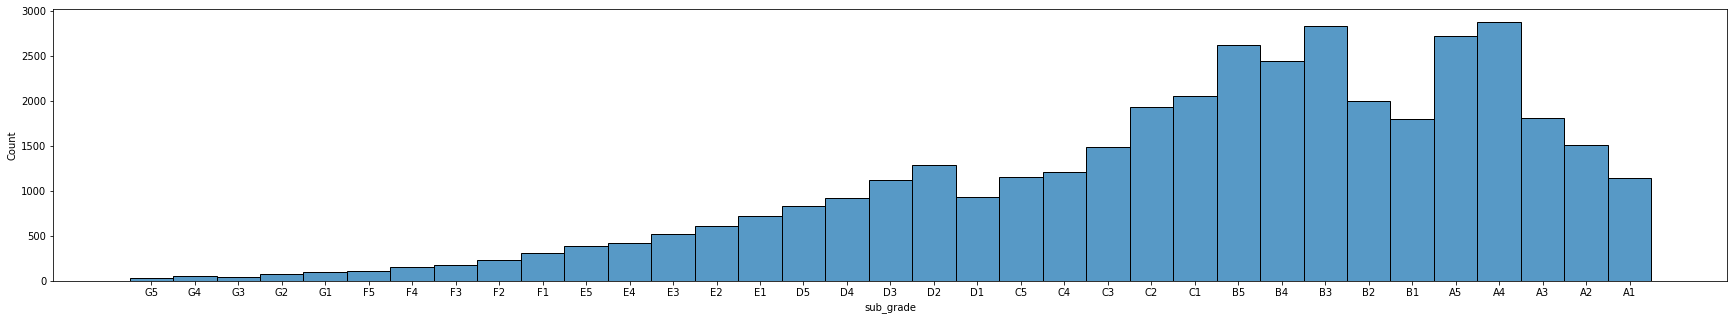

In [176]:
# subgrade
plot_hist(loan_df,'sub_grade',3)

A4    2695
A5    2498
B3    2484
B5    2259
B4    2108
B2    1773
C1    1719
A3    1707
B1    1626
C2    1610
A2    1434
C3    1218
A1    1109
D2    1015
C4     994
C5     946
D3     860
D1     764
D4     703
D5     625
E1     524
E2     451
E3     397
E4     298
E5     278
F1     214
F2     163
F3     123
F4      98
G1      63
F5      59
G2      49
G4      41
G3      26
G5      19
Name: sub_grade, dtype: int64
A4    8.179059
A5    7.581184
B3    7.538695
B5    6.855842
B4    6.397572
B2    5.380880
C1    5.216995
A3    5.180577
B1    4.934750
C2    4.886191
A2    4.352049
C3    3.696510
A1    3.365706
D2    3.080425
C4    3.016692
C5    2.871017
D3    2.610015
D1    2.318665
D4    2.133536
D5    1.896813
E1    1.590288
E2    1.368741
E3    1.204856
E4    0.904401
E5    0.843703
F1    0.649469
F2    0.494689
F3    0.373293
F4    0.297420
G1    0.191199
F5    0.179059
G2    0.148710
G4    0.124431
G3    0.078907
G5    0.057663
Name: sub_grade, dtype: float64


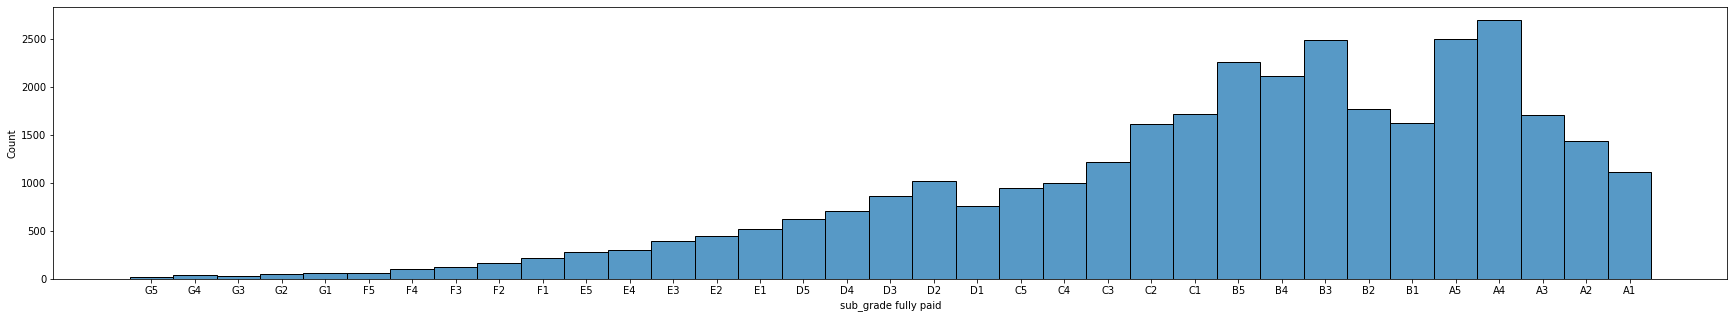

In [175]:
plot_hist(loan_df,'sub_grade',1)

B5    356
B3    341
C1    336
B4    329
C2    321
D2    271
C3    270
D3    256
B2    228
A5    217
D4    215
C4    212
D5    209
C5    208
E1    198
A4    178
B1    171
D1    167
E2    163
E4    126
E3    119
E5    109
A3    103
F1     91
A2     74
F2     70
F5     54
F4     53
F3     51
G1     31
A1     30
G2     28
G3     19
G4     13
G5     10
Name: sub_grade, dtype: int64
B5    6.326639
B3    6.060068
C1    5.971210
B4    5.846810
C2    5.704638
D2    4.816065
C3    4.798294
D3    4.549494
B2    4.051893
A5    3.856407
D4    3.820864
C4    3.767549
D5    3.714235
C5    3.696463
E1    3.518749
A4    3.163320
B1    3.038919
D1    2.967834
E2    2.896748
E4    2.239204
E3    2.114804
E5    1.937089
A3    1.830460
F1    1.617203
A2    1.315088
F2    1.244002
F5    0.959659
F4    0.941887
F3    0.906344
G1    0.550915
A1    0.533144
G2    0.497601
G3    0.337658
G4    0.231029
G5    0.177715
Name: sub_grade, dtype: float64


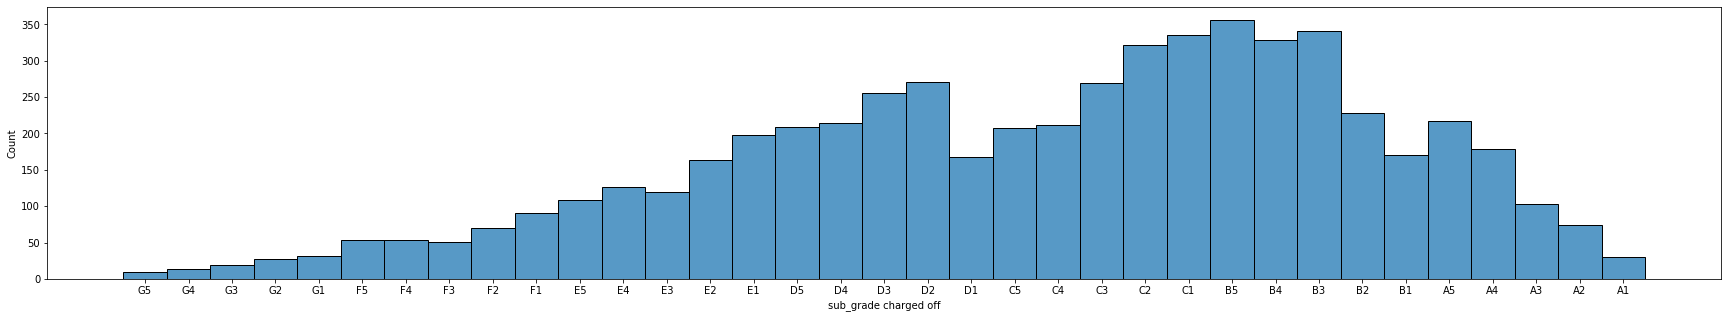

In [174]:
plot_hist(loan_df,'sub_grade',0)

Observation on 'Grade' categories: Most of the Charged-off are observed in 'B' and 'C' Grades, almost 50% of the Chargeoff Population, but it is alos observed that number of loans in lower sub-grades are more than its higher sub-grades, except for Grade C, where it is a opposite trend.

In [36]:
#Employement Length
loan_df.emp_length.unique()

array(['1 year', '10+ years', '3 years', '4 years', '< 1 year', '6 years',
       '2 years', '9 years', '8 years', '5 years', '7 years', nan],
      dtype=object)

In [37]:
# converting the 'emp_length' column to int from string.
loan_df['emp_length'].replace('< 1 year', '0 years', inplace = True)
loan_df['emp_length'].replace('10+ years', '10 years', inplace = True)
#loan_df['emp_length'] = loan_df['emp_length'].apply(lambda x: (x.split(' ')[0]))
print(loan_df['emp_length'].unique())
loan_df['emp_length'] = loan_df['emp_length'].apply(lambda x: x if pd.isnull(x) else float(x.split(' ')[0]))
print(loan_df['emp_length'].unique())

['1 year' '10 years' '3 years' '4 years' '0 years' '6 years' '2 years'
 '9 years' '8 years' '5 years' '7 years' nan]
[ 1. 10.  3.  4.  0.  6.  2.  9.  8.  5.  7. nan]


count    37544.000000
mean         4.940976
std          3.557082
min          0.000000
25%          2.000000
50%          4.000000
75%          9.000000
max         10.000000
Name: emp_length, dtype: float64


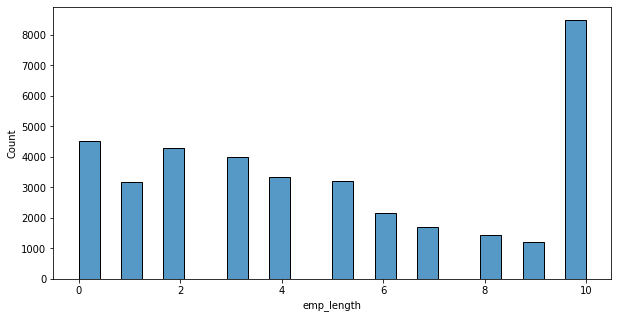

In [38]:
print(loan_df['emp_length'].describe())
plt.figure(figsize = (10,5))
sns.histplot(loan_df.emp_length)

10.0    1331
0.0      639
2.0      567
3.0      555
4.0      462
5.0      458
1.0      456
6.0      307
7.0      263
8.0      203
9.0      158
Name: emp_length, dtype: int64
10.0    24.652713
0.0     11.835525
2.0     10.501945
3.0     10.279681
4.0      8.557140
5.0      8.483052
1.0      8.446009
6.0      5.686238
7.0      4.871272
8.0      3.759956
9.0      2.926468
Name: emp_length, dtype: float64


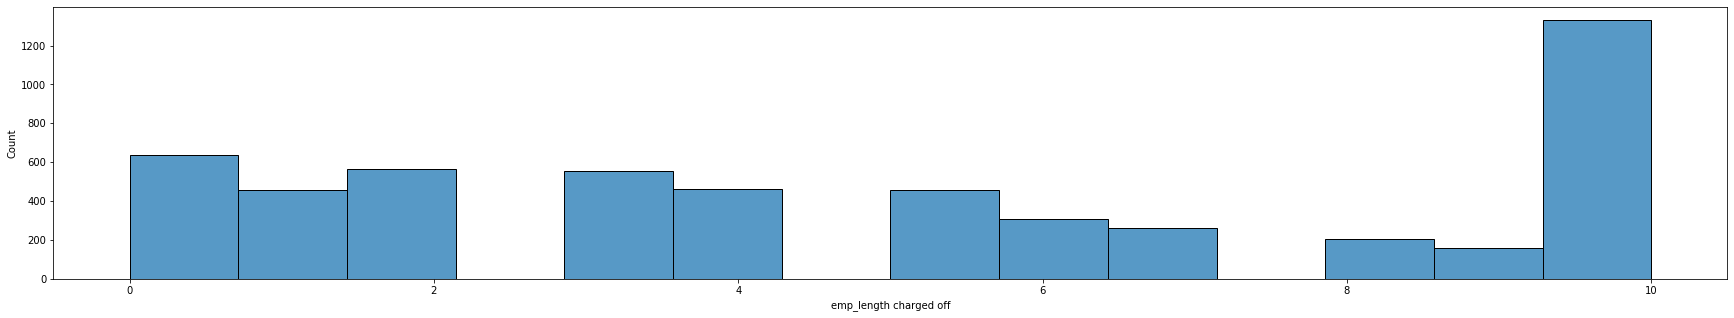

In [39]:
plot_hist(loan_df,'emp_length',0)

10.0    7157
0.0     3869
2.0     3724
3.0     3457
4.0     2880
5.0     2736
1.0     2713
6.0     1861
7.0     1448
8.0     1232
9.0     1068
Name: emp_length, dtype: int64
10.0    22.264738
0.0     12.036086
2.0     11.585005
3.0     10.754394
4.0      8.959403
5.0      8.511433
1.0      8.439882
6.0      5.789392
7.0      4.504589
8.0      3.832633
9.0      3.322445
Name: emp_length, dtype: float64


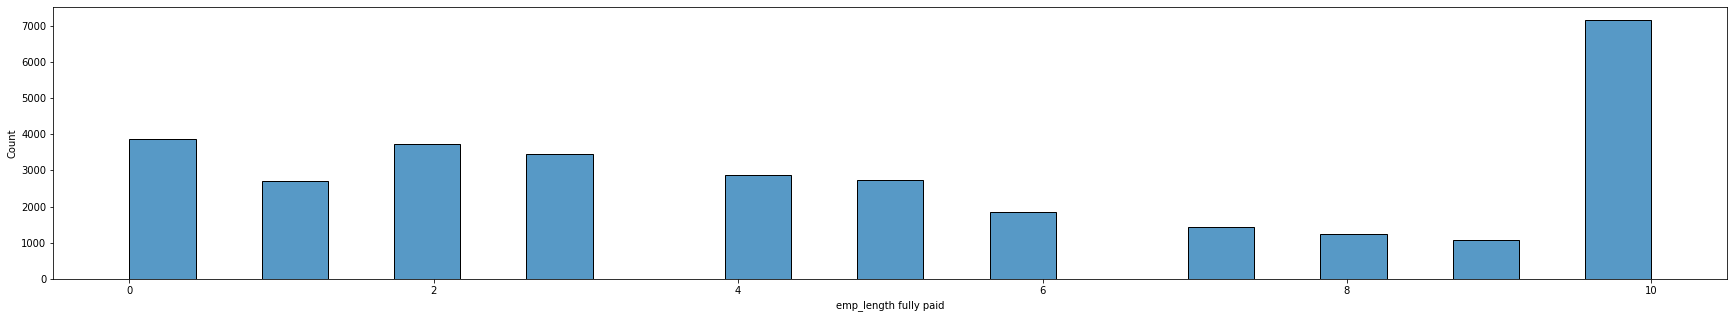

In [40]:
plot_hist(loan_df,'emp_length',1)

Observation: Employment length is not providing any insights here, as borrowers with 10+ years of employment are more in both the population 'Fully Paid' and 'Charged-off'

60000.0    3.800192
50000.0    2.667392
40000.0    2.216347
45000.0    2.102289
30000.0    2.094512
             ...   
78708.0    0.002592
47544.0    0.002592
35292.0    0.002592
77976.0    0.002592
8472.0     0.002592
Name: annual_inc, Length: 5215, dtype: float64


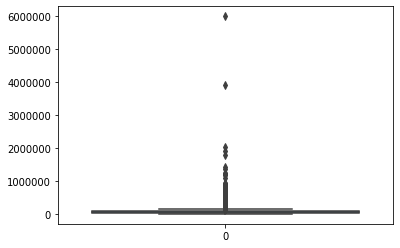

In [41]:
print(loan_df.annual_inc.value_counts(normalize = True)*100)
sns.boxplot(loan_df['annual_inc'])

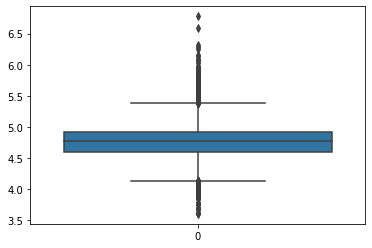

In [42]:
#converting 'annual_inc' to 'log_annual_inc', i.e. log of annual income inorder to fit it into box-plot and check outliers
loan_df['log_annual_inc'] = loan_df['annual_inc'].apply(lambda x: np.log10(x))
sns.boxplot(loan_df['log_annual_inc'])


In [52]:
loan_df.groupby('loan_status')['log_annual_inc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5627.0,4.723308,0.243184,3.61066,4.568202,4.724276,4.875061,6.096910
Fully Paid,32950.0,4.770893,0.242443,3.60206,4.614188,4.778151,4.924279,6.778151


{'whiskers': [<matplotlib.lines.Line2D at 0x1af0e9a9148>,
 'caps': [<matplotlib.lines.Line2D at 0x1af0e9a9e08>,
 'boxes': [<matplotlib.lines.Line2D at 0x1af0e9a9488>],
 'medians': [<matplotlib.lines.Line2D at 0x1af0e9a12c8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1af0abd4e08>],
 'means': []}

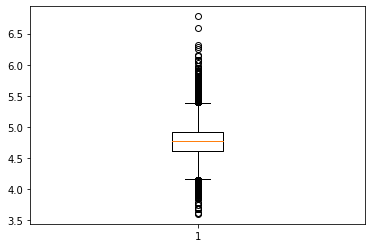

In [53]:
# Fully Paid
loan_df_fp = loan_df[loan_df['loan_status_flag'] == 1]
plt.boxplot(loan_df_fp['log_annual_inc'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1af0c7ad948>,
 'caps': [<matplotlib.lines.Line2D at 0x1af0c7ada88>,
 'boxes': [<matplotlib.lines.Line2D at 0x1af0e909048>],
 'medians': [<matplotlib.lines.Line2D at 0x1af0e9ae248>],
 'fliers': [<matplotlib.lines.Line2D at 0x1af0e9ae188>],
 'means': []}

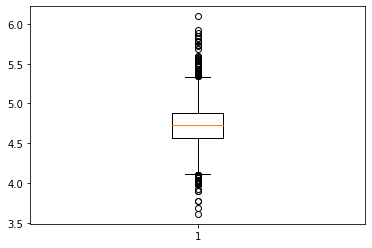

In [54]:
# Charged Off
loan_df_ci = loan_df[loan_df['loan_status_flag'] == 0]
plt.boxplot(loan_df_ci['log_annual_inc'])

Observation: Charged Off accounts have less spread of Income when compared to Fully Paid accounts, so it shows higher income accounts are less likely to Default.

In [55]:
# distribution of 'loan_status' of the loan
loan_df.loan_status.value_counts(normalize = True)*100

Fully Paid     85.413588
Charged Off    14.586412
Name: loan_status, dtype: float64

In [56]:
# since 'int_rate' is a string datatype, converting it into float
loan_df.int_rate = loan_df.int_rate.apply(lambda x: float(x.strip('%')))

AttributeError: 'float' object has no attribute 'strip'

count    38577.000000
mean        11.932219
std          3.691327
min          5.420000
25%          8.940000
50%         11.710000
75%         14.380000
max         24.400000
Name: int_rate, dtype: float64


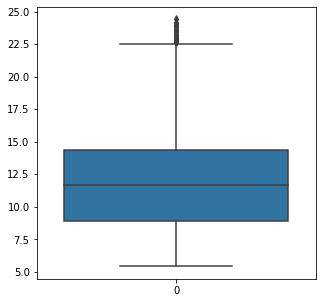

In [57]:
print(loan_df.int_rate.describe())
plt.figure(figsize=(5,5))
sns.boxplot(loan_df['int_rate'] )

In [58]:
loan_df.groupby('loan_status')['int_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5627.0,13.820432,3.654413,5.42,11.31,13.61,16.40,24.40
Fully Paid,32950.0,11.609761,3.599964,5.42,8.49,11.49,13.99,24.11


{'whiskers': [<matplotlib.lines.Line2D at 0x1af0e3c8b08>,
 'caps': [<matplotlib.lines.Line2D at 0x1af0e3c8c48>,
 'boxes': [<matplotlib.lines.Line2D at 0x1af0e3c83c8>],
 'medians': [<matplotlib.lines.Line2D at 0x1af0e3cdfc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1af0e3cdcc8>],
 'means': []}

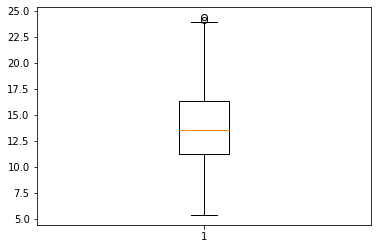

In [60]:
plt.boxplot(loan_df_ci['int_rate'] )

Observation: 'Charged Off' accounts are charged higher Interest Rates when compared to 'Fully Paid' accounts, almost by 3%

count    38577.000000
mean       322.466318
std        208.639215
min         15.690000
25%        165.740000
50%        277.860000
75%        425.550000
max       1305.190000
Name: installment, dtype: float64


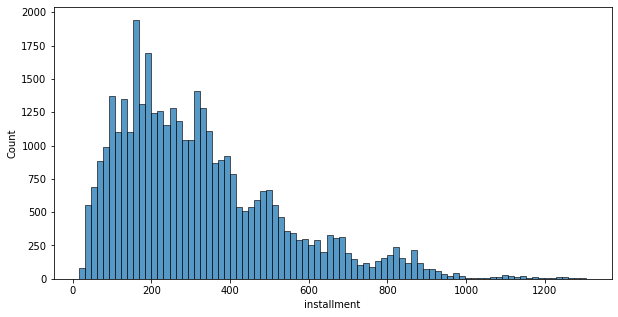

In [61]:
# installment
print(loan_df.installment.describe())
plt.figure(figsize=(10,5))
sns.histplot(loan_df['installment'] )

In [62]:
loan_df.groupby('loan_status')['installment'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5627.0,336.175006,217.051841,22.79,168.5550,293.87,457.840,1305.19
Fully Paid,32950.0,320.125232,207.081110,15.69,165.2825,275.65,420.735,1295.21


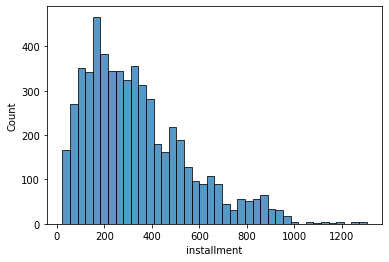

In [63]:
#sns.boxplot(loan_df_ci['installment'] )
sns.histplot(loan_df_ci['installment'] )

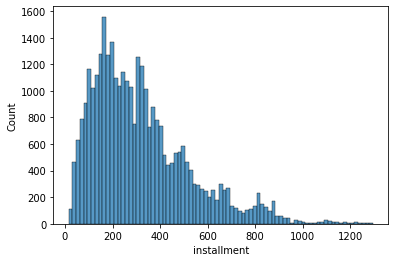

In [64]:
#sns.boxplot(loan_df_fp['installment'] )
sns.histplot(loan_df_fp['installment'] )

Observation: Installments are marginally higher for Charged Off Accounts when compared to Fully Paid accounts, which is intuitive as Interest rates are also higher for Charged Off accounts than Fully Paid accounts

count    38577.000000
mean        13.272727
std          6.673044
min          0.000000
25%          8.130000
50%         13.370000
75%         18.560000
max         29.990000
Name: dti, dtype: float64


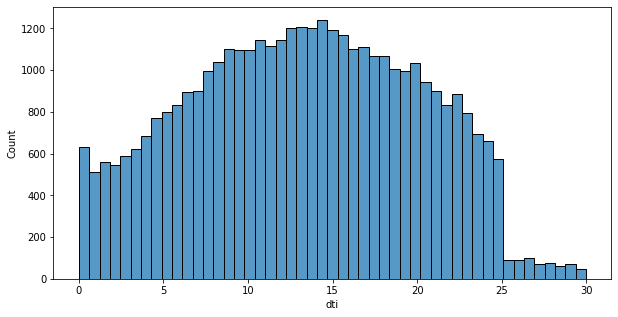

In [65]:
# dti
print(loan_df.dti.describe())
plt.figure(figsize=(10,5))
sns.histplot(loan_df['dti'] )

In [66]:
loan_df.groupby('loan_status')['dti'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5627.0,14.000624,6.585577,0.0,9.05,14.29,19.29,29.85
Fully Paid,32950.0,13.148421,6.680041,0.0,7.98,13.20,18.39,29.99


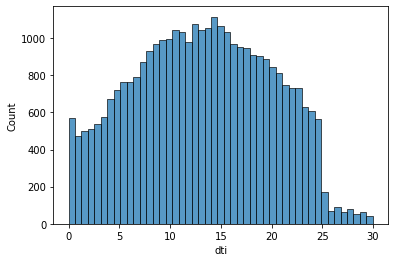

In [67]:
sns.histplot(loan_df_fp['dti'] )

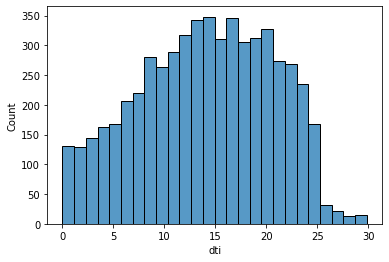

In [68]:
sns.histplot(loan_df_ci['dti'] )

Observation: Charged Off loans have marginally higher dti when compared to Fully Paid loans. 

In [69]:
# earliest_cr_line
# converting the 'earliset_cr_line' to only 'Year' for looking into the history of Credit line Issued
import datetime

def pickDate(earliest_cr_line):
    dt = int(datetime.datetime.strptime(earliest_cr_line, '%b-%y').strftime('%Y'))
    
    if (dt >= 2030):
        dt-=100
    return dt 
loan_df.earliest_cr_line = loan_df.earliest_cr_line.apply(pickDate)
loan_df.earliest_cr_line

32979    1991
8515     1990
38972    2000
10829    1989
15527    1994
         ... 
10586    1989
25143    1976
22270    2003
12320    1986
26034    2000
Name: earliest_cr_line, Length: 38577, dtype: int64

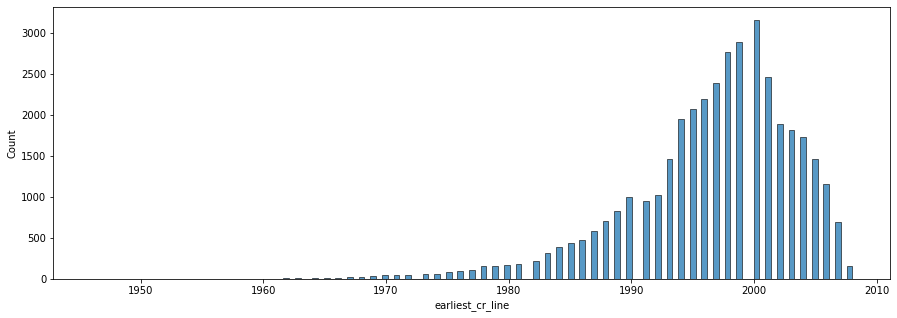

In [70]:
plt.figure(figsize=(15,5))
sns.histplot(loan_df['earliest_cr_line'] )

In [71]:
loan_df.groupby('loan_status')['earliest_cr_line'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5627.0,1996.947396,6.757051,1962.0,1994.0,1998.0,2001.0,2008.0
Fully Paid,32950.0,1996.546313,6.824043,1946.0,1993.0,1998.0,2001.0,2008.0


2000    500
1999    442
1998    415
1997    374
2001    356
1995    303
1996    299
1994    275
2002    255
2005    239
2004    229
2003    225
2006    224
1993    195
2007    144
1991    143
1992    135
1990    125
1989    112
1988    106
1987     77
1985     66
1983     53
1986     53
1984     49
1982     32
1979     31
2008     28
1978     23
1981     20
1980     16
1977     13
1973     12
1975      9
1972      8
1970      7
1974      6
1968      5
1967      5
1971      5
1976      4
1969      3
1966      2
1962      2
1965      1
1963      1
Name: earliest_cr_line, dtype: int64
2000    8.885730
1999    7.854985
1998    7.375156
1997    6.646526
2001    6.326639
1995    5.384752
1996    5.313666
1994    4.887151
2002    4.531722
2005    4.247379
2004    4.069664
2003    3.998578
2006    3.980807
1993    3.465435
2007    2.559090
1991    2.541319
1992    2.399147
1990    2.221432
1989    1.990403
1988    1.883775
1987    1.368402
1985    1.172916
1983    0.941887
1986    0.941887
198

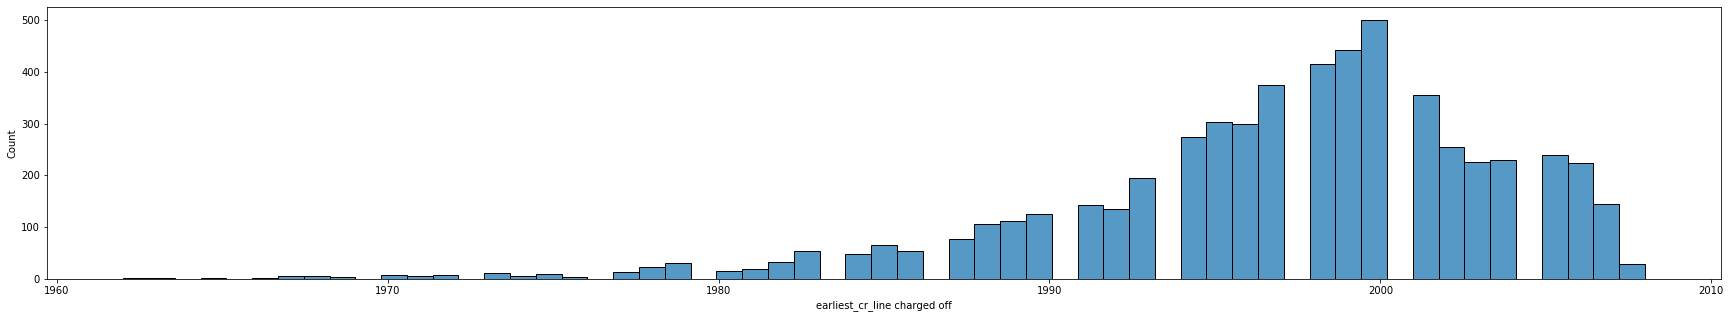

In [83]:
plot_hist(loan_df,'earliest_cr_line',0)
#sns.histplot(loan_df_ci['earliest_cr_line'] )

2000    2660
1999    2454
1998    2358
2001    2106
1997    2013
1996    1903
1995    1775
1994    1673
2002    1635
2003    1588
2004    1498
1993    1265
2005    1228
2006     930
1992     894
1990     880
1991     802
1989     722
1988     603
2007     554
1987     513
1986     425
1985     373
1984     346
1983     269
1982     183
1981     161
1980     159
1978     138
1979     126
2008     125
1977      99
1976      89
1975      74
1974      56
1973      49
1972      41
1970      40
1971      40
1969      34
1968      14
1967      13
1963       9
1966       9
1965       7
1964       6
1962       3
1961       2
1954       2
1959       1
1946       1
1956       1
1950       1
Name: earliest_cr_line, dtype: int64
2000    8.072838
1999    7.447648
1998    7.156297
2001    6.391502
1997    6.109256
1996    5.775417
1995    5.386950
1994    5.077390
2002    4.962064
2003    4.819423
2004    4.546282
1993    3.839150
2005    3.726859
2006    2.822458
1992    2.713202
1990    2.670713
19

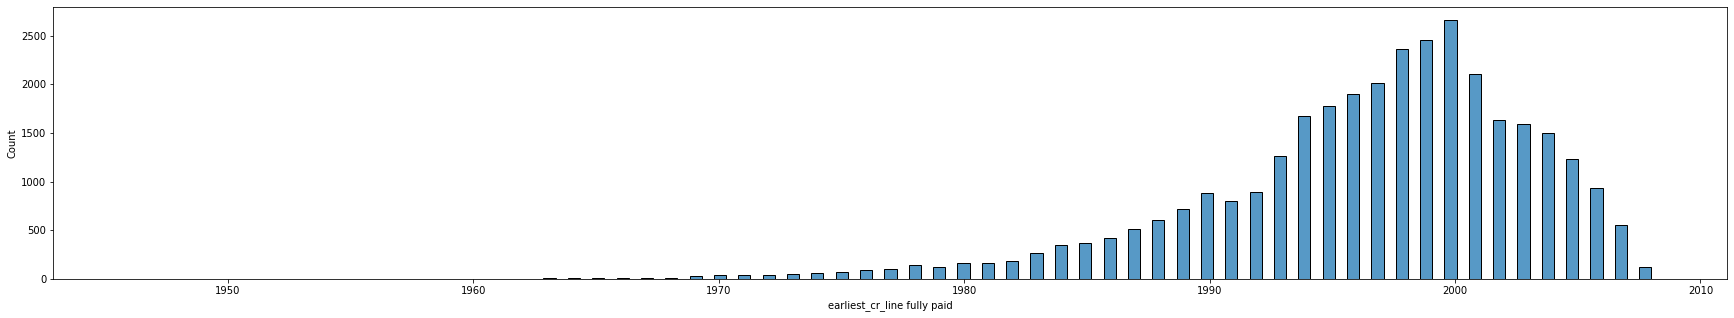

In [81]:
plot_hist(loan_df,'earliest_cr_line',1)
#plt.boxplot(loan_df_fp['earliest_cr_line'] )

From above three graphs it is observed that there is an increase in numbers of new 'credit-lines' during the period 1993-2000. And it quite evindent that, Charged Off loans are also higher in numbers from this period.

In [85]:
loan_df.groupby('loan_status')['delinq_2yrs'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5627.0,0.170606,0.534986,0.0,0.0,0.0,0.0,8.0
Fully Paid,32950.0,0.142580,0.484491,0.0,0.0,0.0,0.0,11.0


0     34386
1      3207
2       673
3       212
4        60
5        21
6        10
7         4
8         2
11        1
9         1
Name: delinq_2yrs, dtype: int64
0     89.136014
1      8.313244
2      1.744563
3      0.549550
4      0.155533
5      0.054437
6      0.025922
7      0.010369
8      0.005184
11     0.002592
9      0.002592
Name: delinq_2yrs, dtype: float64


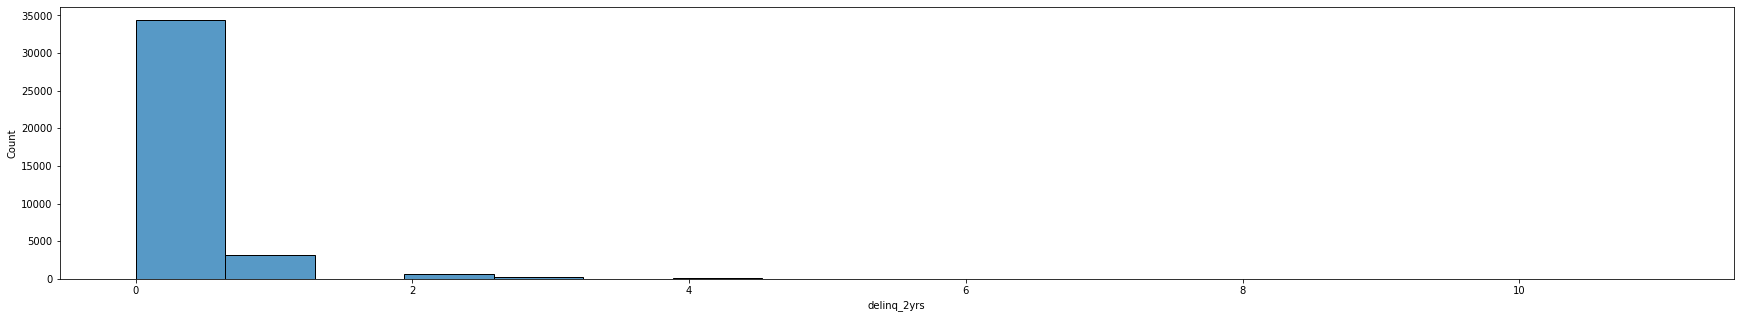

In [84]:
plot_hist(loan_df,'delinq_2yrs',3)

currently we canot conclude anything, but delinquency may be used in further, while carrying out Bivariate analysis

In [86]:
#pub_rec_bankruptcies
loan_df.groupby('loan_status')['pub_rec_bankruptcies'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5509.0,0.067163,0.251773,0.0,0.0,0.0,0.0,2.0
Fully Paid,32371.0,0.039449,0.195139,0.0,0.0,0.0,0.0,2.0


0.0    31097
1.0     1271
2.0        3
Name: pub_rec_bankruptcies, dtype: int64
0.0    96.064379
1.0     3.926354
2.0     0.009268
Name: pub_rec_bankruptcies, dtype: float64


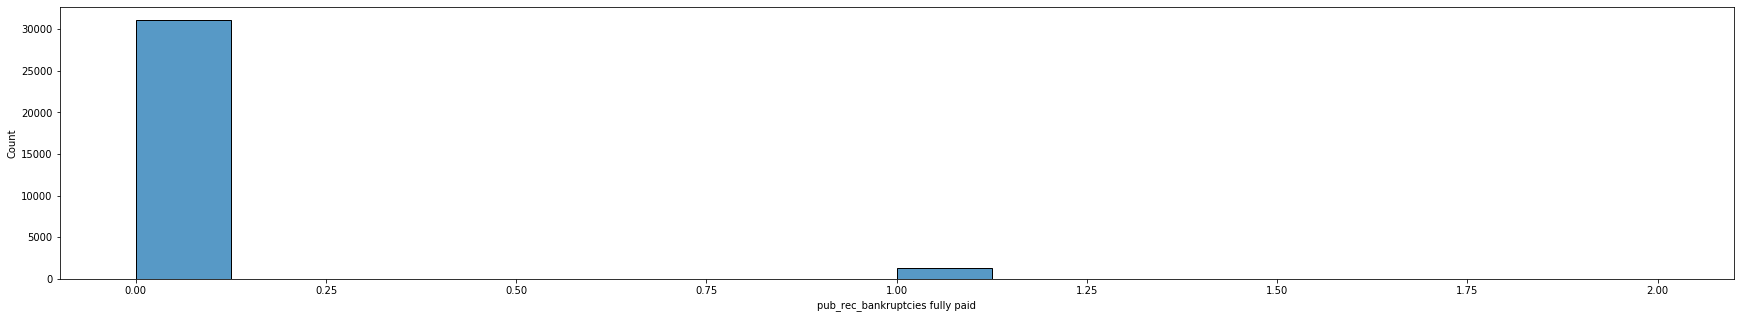

In [91]:
#fully-paid
plot_hist(loan_df, 'pub_rec_bankruptcies', 1)

0.0    5141
1.0     366
2.0       2
Name: pub_rec_bankruptcies, dtype: int64
0.0    93.320022
1.0     6.643674
2.0     0.036304
Name: pub_rec_bankruptcies, dtype: float64


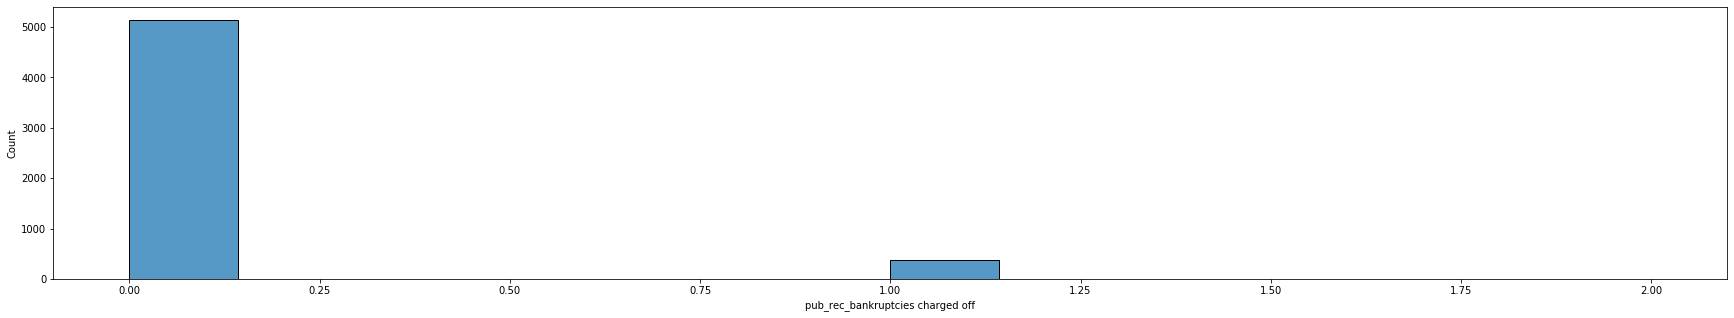

In [92]:
# Charged-off
plot_hist(loan_df, 'pub_rec_bankruptcies', 0)

It is observed that Charged off loans are not necesarily reported in Public records as Bankrupt.

In [94]:
# pub_rec
loan_df.groupby('loan_status')['pub_rec'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5627.0,0.08477,0.284873,0.0,0.0,0.0,0.0,2.0
Fully Paid,32950.0,0.05041,0.228429,0.0,0.0,0.0,0.0,4.0


0    31347
1     1556
2       38
3        7
4        2
Name: pub_rec, dtype: int64
0    95.135053
1     4.722307
2     0.115326
3     0.021244
4     0.006070
Name: pub_rec, dtype: float64


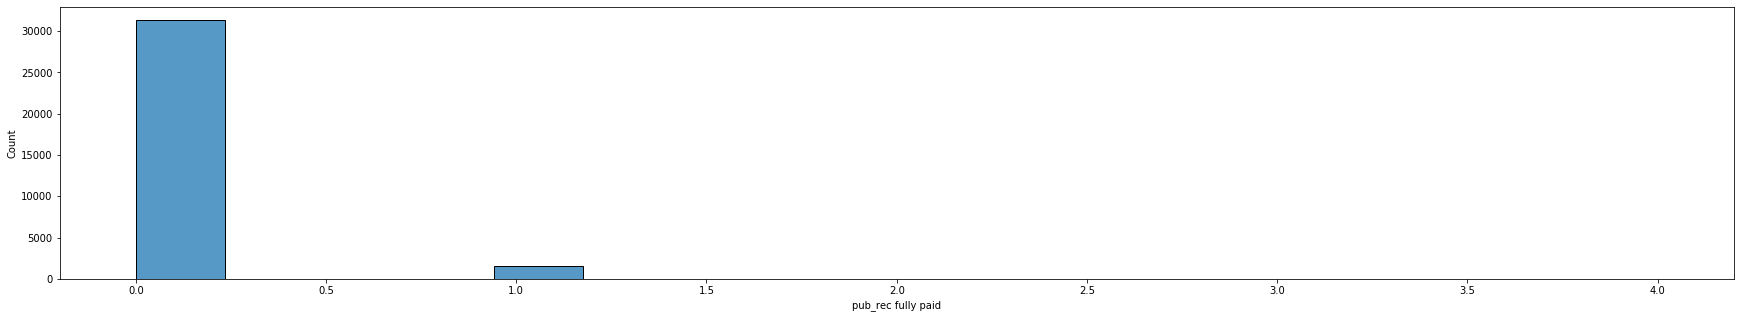

In [97]:
plot_hist(loan_df, 'pub_rec', 1)

0    5160
1     457
2      10
Name: pub_rec, dtype: int64
0    91.700729
1     8.121557
2     0.177715
Name: pub_rec, dtype: float64


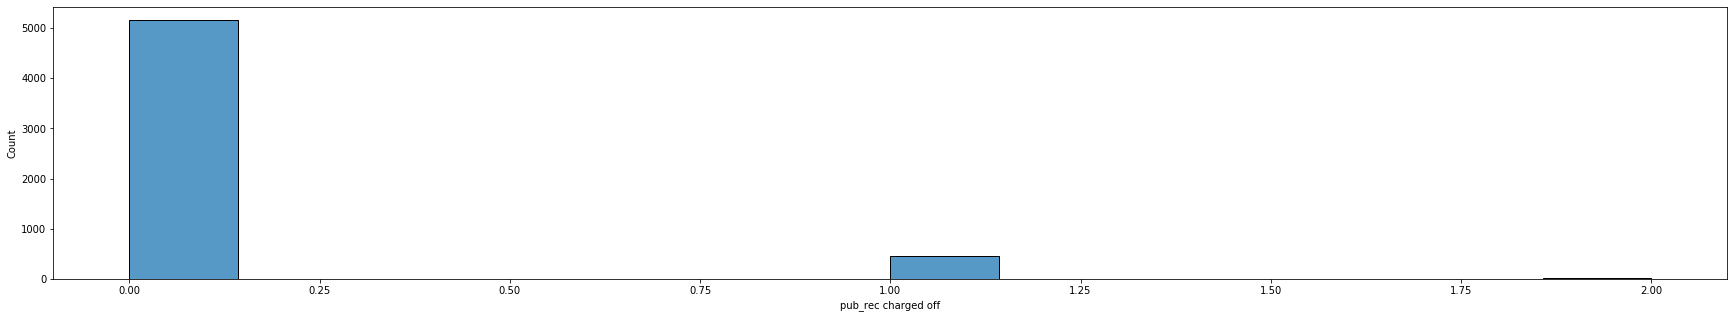

In [98]:
plot_hist(loan_df, 'pub_rec', 0)

It is observed that Charged off loans are reported in Public Deregatory records twice the numbers in Fully Paid loans, which may be a driving factor for further analysis.

In [99]:
# revol_util
# stripping '%' from the data presnt in revol_util column. 

loan_df.revol_util = loan_df.revol_util.apply(lambda x: float(str(x).strip('%')))

In [100]:
loan_df.groupby('loan_status')['revol_util'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5611.0,55.572110,27.905282,0.0,34.4,58.4,79.0,99.9
Fully Paid,32916.0,47.531801,28.276743,0.0,23.9,47.6,70.8,99.9


0.00     144
66.60     17
63.70     15
89.40     15
73.40     15
        ... 
99.70      1
3.30       1
3.70       1
32.04      1
12.60      1
Name: revol_util, Length: 999, dtype: int64
0.00     2.566387
66.60    0.302976
63.70    0.267332
89.40    0.267332
73.40    0.267332
           ...   
99.70    0.017822
3.30     0.017822
3.70     0.017822
32.04    0.017822
12.60    0.017822
Name: revol_util, Length: 999, dtype: float64


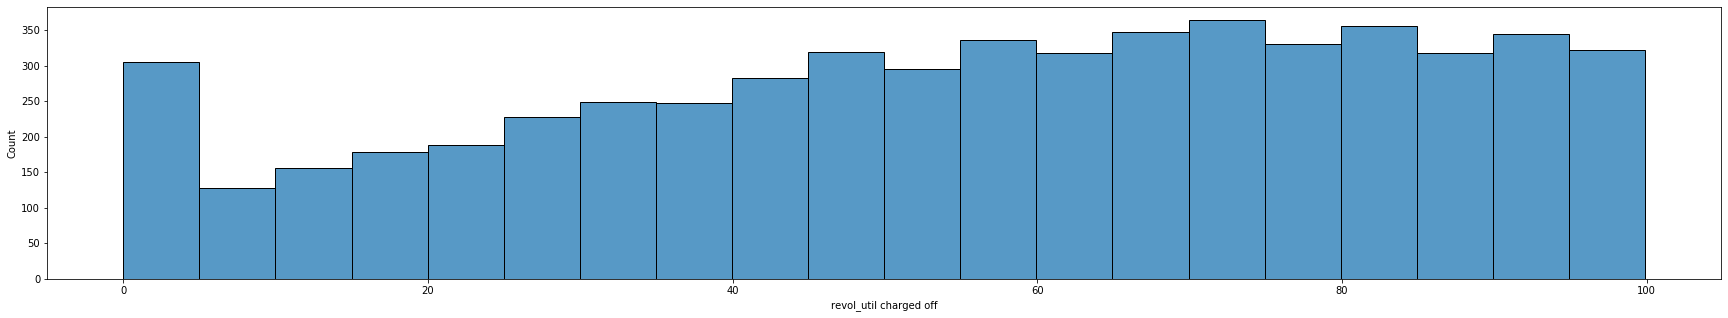

In [101]:
# charged off
plot_hist(loan_df,'revol_util', 0)

0.00     810
40.70     54
63.00     54
37.60     52
0.20      51
        ... 
32.71      1
25.33      1
47.36      1
5.79       1
0.46       1
Name: revol_util, Length: 1077, dtype: int64
0.00     2.460809
40.70    0.164054
63.00    0.164054
37.60    0.157978
0.20     0.154940
           ...   
32.71    0.003038
25.33    0.003038
47.36    0.003038
5.79     0.003038
0.46     0.003038
Name: revol_util, Length: 1077, dtype: float64


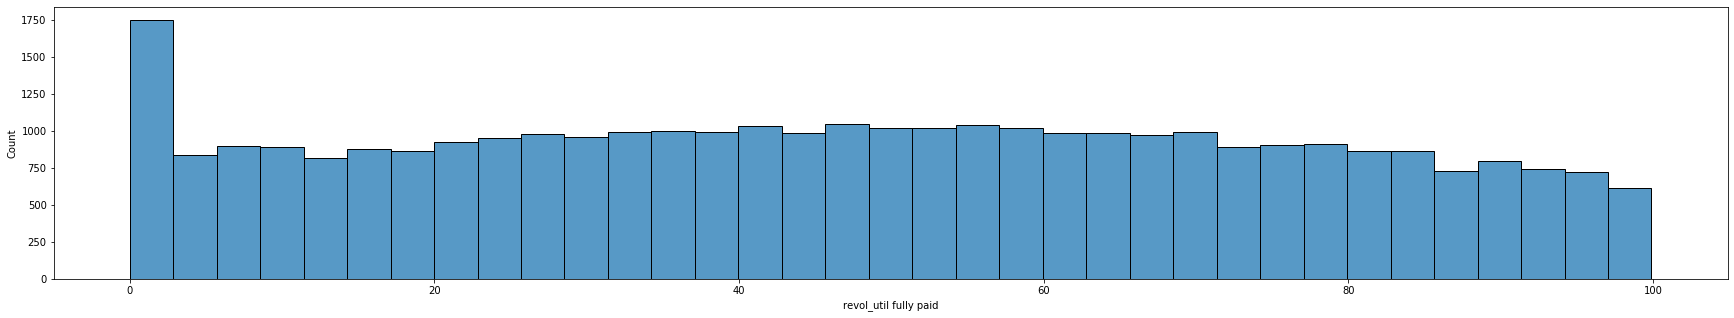

In [102]:
# Fully paid
plot_hist(loan_df,'revol_util',1)

In [155]:
#revol_bal
loan_df.groupby('loan_status')['revol_bal'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5627.0,13514.243647,15164.117475,0.0,3968.0,9211.0,17518.00,148829.0
Fully Paid,32950.0,13251.107739,15983.260153,0.0,3603.0,8682.5,16804.75,149588.0


In [171]:
# log transformation of revol_bal data as they are widely spread, which can be seen from above table's 25%ile and 75%ile 
loan_df['log_revol_bal'] = loan_df['revol_bal'].apply(lambda x: np.log10(x))
loan_df.groupby('loan_status')['log_revol_bal'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5627.0,-inf,NaN,-inf,3.598572,3.964307,4.243485,5.172688
Fully Paid,32950.0,-inf,NaN,-inf,3.556664,3.938645,4.225432,5.174897


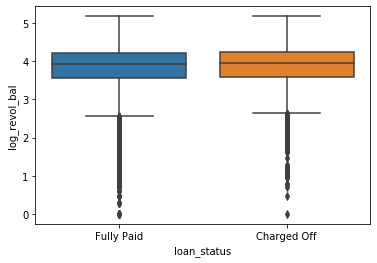

In [173]:
# revol_bal comparision in charged off vs Fully paid
sns.boxplot(data = loan_df, x = loan_df['loan_status'], y = loan_df['log_revol_bal'])

It is observed that median of Revolving Credit Utility in Charged Off loans is marginally higher than Fully Paid

In [118]:
# total_acc
loan_df.groupby('loan_status')['total_acc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5627.0,21.427581,11.447427,2.0,13.0,20.0,28.0,74.0
Fully Paid,32950.0,22.159393,11.418927,2.0,14.0,20.0,29.0,90.0


It is observed that 'Charged Off' accounts does not differ much from 'Fully Paid' accounts.

CA    19.992891
FL     8.956815
NY     8.796872
TX     5.615781
NJ     4.940466
GA     3.820864
IL     3.500977
PA     3.198863
VA     3.145548
MD     2.878976
MA     2.825662
OH     2.754576
WA     2.256975
AZ     2.185889
NC     2.025946
MO     2.025946
NV     1.919318
MI     1.830460
CO     1.741603
CT     1.670517
MN     1.439488
OR     1.261774
SC     1.172916
WI     1.119602
AL     0.959659
LA     0.941887
KY     0.799716
OK     0.710858
UT     0.710858
KS     0.550915
NM     0.533144
HI     0.497601
AR     0.479829
NH     0.444286
RI     0.444286
WV     0.373201
AK     0.266572
DC     0.266572
SD     0.213258
DE     0.213258
MT     0.195486
VT     0.106629
WY     0.071086
NE     0.053314
MS     0.035543
TN     0.035543
ID     0.017771
Name: addr_state, dtype: float64


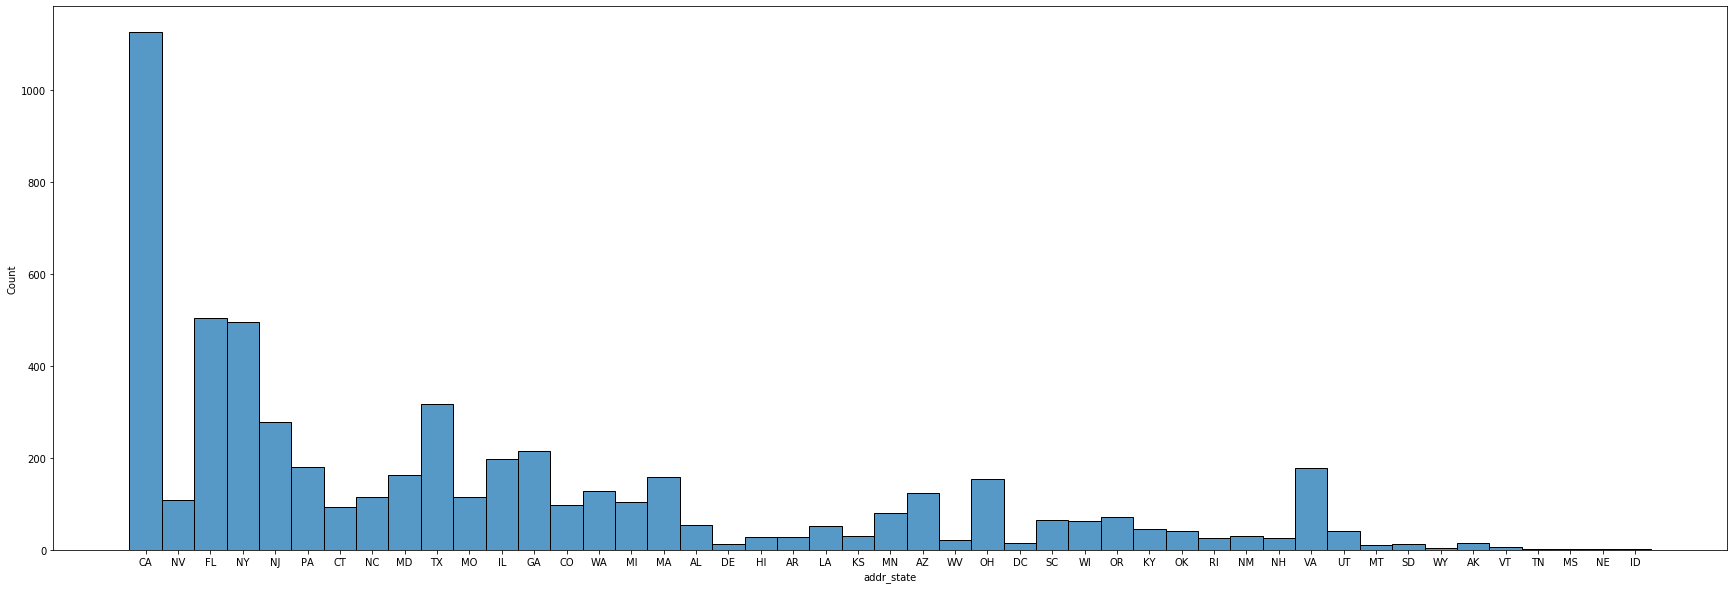

In [178]:
# addr_state
## for Charged-off account
plt.figure(figsize = (30,10))
print(loan_df_ci['addr_state'].value_counts(normalize = True)*100)
sns.histplot(x = loan_df_ci['addr_state'], data = loan_df_ci['addr_state'].value_counts(normalize = True))

CA    17.675266
NY     9.720789
TX     7.110774
FL     6.910470
NJ     4.588771
PA     3.908953
IL     3.887709
VA     3.617602
GA     3.471927
MA     3.453718
OH     3.104704
MD     2.613050
AZ     2.203338
WA     2.097117
CO     2.027314
NC     1.930197
CT     1.918058
MI     1.823976
MO     1.687405
MN     1.590288
SC     1.192716
AL     1.156297
WI     1.144158
LA     1.135053
NV     1.125948
OR     1.104704
KY     0.807284
OK     0.749621
KS     0.679818
UT     0.643399
AR     0.631259
DC     0.594841
RI     0.512898
NM     0.464340
WV     0.458270
NH     0.427921
HI     0.418816
DE     0.306525
WY     0.230653
MT     0.218513
AK     0.191199
SD     0.151745
VT     0.142640
MS     0.051593
TN     0.045524
IN     0.027314
IA     0.015175
ID     0.015175
ME     0.009105
NE     0.006070
Name: addr_state, dtype: float64


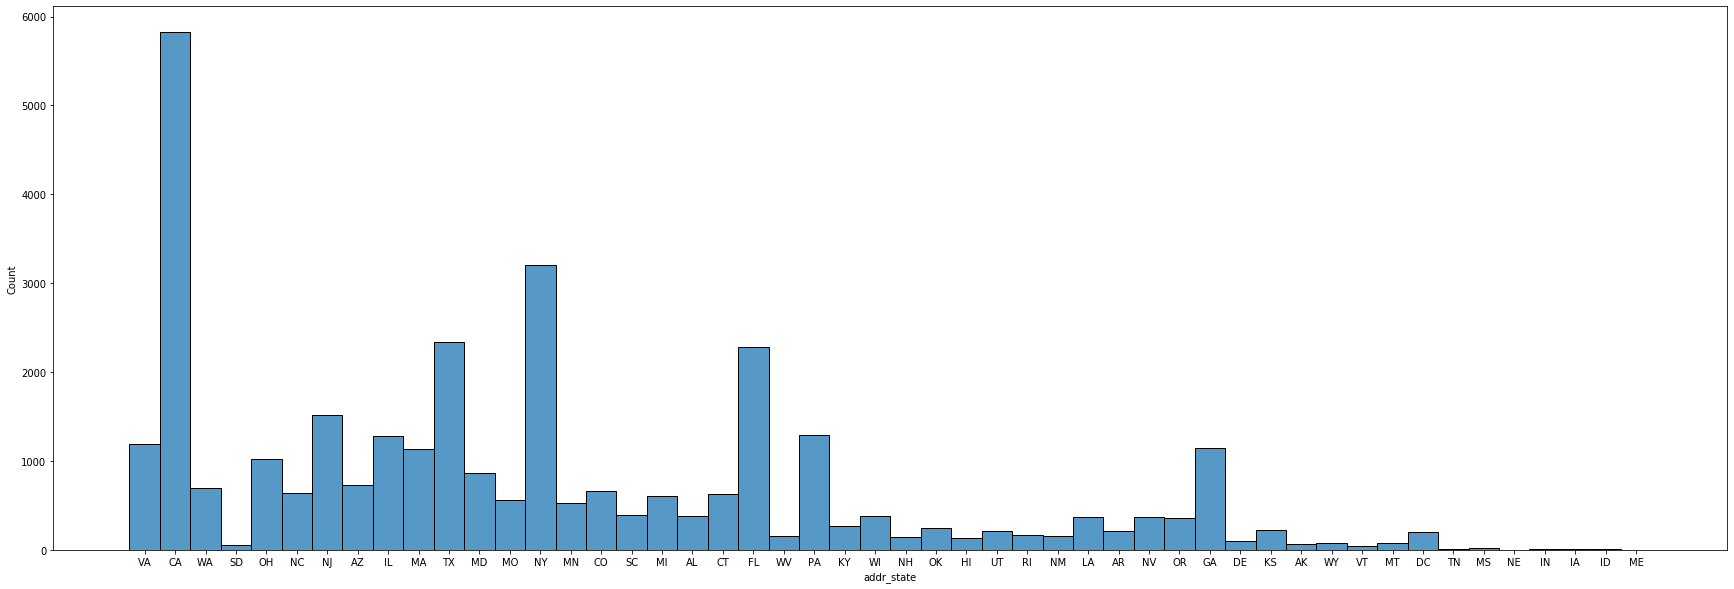

In [152]:
# addr_state
## for Fully Paid account
plt.figure(figsize = (30,10))
print(loan_df_fp['addr_state'].value_counts(normalize = True)*100)
sns.histplot(x = loan_df_fp['addr_state'], data = loan_df_fp['addr_state'].value_counts(normalize = True))

Using 'addr_state' column, both Fully paid and Charged Off loans are too higher for CL compared to other states. So any insights cannot be drawn from the 'addr_state' col

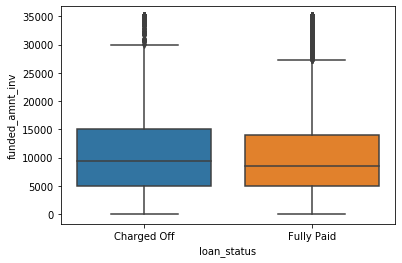

In [189]:
#funded_amnt_inv
sns.boxplot(data = loan_df, x = loan_df['loan_status'], y = loan_df['funded_amnt_inv'])

In [193]:
#funded_amnt_inv
loan_df.groupby('loan_status')['funded_amnt_inv'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5627.0,10864.521324,7661.750540,0.0,5000.0,9401.209477,15000.0,35000.0
Fully Paid,32950.0,10112.837414,6901.840874,0.0,5000.0,8500.000000,13950.0,35000.0


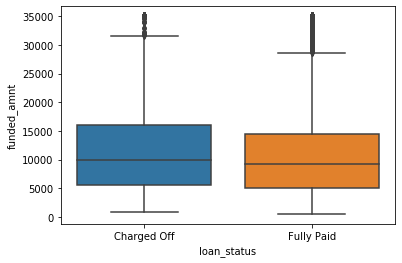

In [190]:
#funded_amnt
sns.boxplot(data = loan_df, x = loan_df['loan_status'], y = loan_df['funded_amnt'])

In [192]:
#funded_amnt
loan_df.groupby('loan_status')['funded_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5627.0,11753.398792,7760.516335,900.0,5575.0,10000.0,16000.0,35000.0
Fully Paid,32950.0,10618.520486,6956.047888,500.0,5050.0,9200.0,14500.0,35000.0


Charged off loans have higher Funding values than Fully paid loans

## Consolidated Observations from Univariate Analysis

1.Charged off loans have higher repayment period.

2.Rental & Mortgage have higher probability of Charged off than rest categories.

3.It is observed that around 49% of the charge off has happened due to debt_consolidation

4.Most of the Charged-off are observed in 'B' and 'C' Grades, almost 50% of the Chargeoff Population, but it is also observed that number of loans in lower sub-grades are more than its higher sub-grades, except for Grade C, where it is a opposite trend.

5.Charged Off accounts have less spread of Income when compared to Fully Paid accounts, so it shows higher income accounts are less likely to Default.

6.Charged Off accounts are charged higher Interest Rates when compared to 'Fully Paid' accounts, almost by 3%.

7.Installments are marginally higher for Charged Off Accounts when compared to Fully Paid accounts, which is intuitive as Interest rates are also higher for Charged Off accounts than Fully Paid accounts

8.Charged Off loans have marginally higher dti when compared to Fully Paid loans.

9.It is observed that Charged off loans are not necesarily reported in Public records as Bankrupt.

10.Charged off loans are reported in Public Deregatory records twice the numbers in Fully Paid loans.

11.Median of Revolving Credit Utility in Charged Off loans is marginally higher than Fully Paid.

12.Charged off loans have higher Funding values than Fully paid loans.

# Bivariate Analysis